In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('test2.csv', delimiter=',')

#data = pd.read_csv('bank.csv', delimiter=';')

In [3]:
x = data[['x1', 'x2']].values
y = data['y1'].values

#x = data[['age', 'balance']].values
#y = data['housing'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
print(x[:,0][y=='no'].shape)
print(x[:,1][y=='no'].shape)
print(x[:,0][y=='no'].shape)
print(x[:,1][y=='yes'].shape)

(0,)
(0,)
(0,)
(0,)


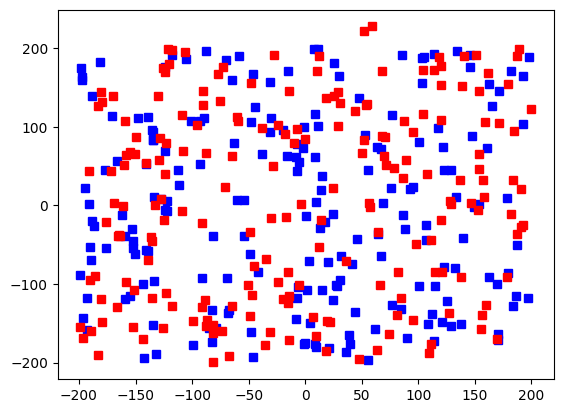

In [5]:
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'rs')

#plt.plot(x[:,0][y=='no'],x[:,1][y=='no'],'bs')
#plt.plot(x[:,0][y=='yes'],x[:,1][y=='yes'],'rs')

In [6]:
log = LogisticRegression(random_state=42)
ran = RandomForestClassifier(random_state=42)
svc = SVC(probability = True,random_state=42)

vote1 = VotingClassifier(estimators =[('lr',log),('rf',ran),('svc',svc)],voting='hard')
vote2 = VotingClassifier(estimators =[('lr',log),('rf',ran),('svc',svc)],voting='soft')

vote1.fit(x_train, y_train)
vote2.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [7]:
log.fit(x_train, y_train)
ran.fit(x_train, y_train)
svc.fit(x_train, y_train)
vote1.fit(x_train, y_train)
vote2.fit(x_train, y_train)

log_pred = log.predict(x_test)
ran_pred = ran.predict(x_test)
svc_pred = svc.predict(x_test)
vote1_pred = vote1.predict(x_test)
vote2_pred = vote2.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, log_pred)
ran_acc = accuracy_score(y_test, ran_pred)
svc_acc = accuracy_score(y_test, svc_pred)
vote1_acc = accuracy_score(y_test, vote1_pred)
vote2_acc = accuracy_score(y_test, vote2_pred)

print('logist reg: ', log_acc)
print('random forest: ', ran_acc)
print('svc: ', svc_acc)
print('voting hard: ', vote1_acc)
print('voting soft: ', vote2_acc)

logist reg:  0.475
random forest:  0.5125
svc:  0.5
voting hard:  0.5125
voting soft:  0.5375
